# データサイエンス基礎


# 2. 分布  10-14（その１）


## 母集団からの標本抽出シミュレーション

### ライブラリのインポート

In [1]:
# 数値計算に使うライブラリ
import numpy as np
import pandas as pd
import scipy as sp
from scipy import stats

# グラフを描画するライブラリ
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

# 表示桁数の指定
%precision 3
# グラフをjupyter Notebook内に表示させるための指定
%matplotlib inline

### 5尾の魚しかいない湖からの標本抽出

In [2]:
fish_5 = np.array([2,3,4,5,6])
fish_5

array([2, 3, 4, 5, 6])

In [3]:
# 母集団からのランダムサンプリング
np.random.choice(fish_5, size = 1, replace = False)

array([3])

In [4]:
# 母集団からのランダムサンプリング
np.random.choice(fish_5, size = 3, replace = False)

array([4, 2, 3])

In [5]:
# コードは同じでも，毎回異なる標本が得られる
np.random.choice(fish_5, size = 3, replace = False)

array([6, 2, 3])

In [6]:
# 乱数の種を指定すると、同じ乱数が何度も出る
np.random.seed(1)
np.random.choice(fish_5, size = 3, replace = False)

array([4, 3, 6])

In [7]:
np.random.seed(1)
np.random.choice(fish_5, size = 3, replace = False)

array([4, 3, 6])

In [8]:
# 標本平均を計算するシミュレーション
np.random.seed(1)
np.mean(
    np.random.choice(fish_5, size = 3, replace = False)
)

4.333

### もっとたくさんの魚がいる湖からの標本抽出

In [9]:
# たくさんの魚(100,000尾)がいる母集団
fish_100000 = pd.read_csv(
    "Details_of_Management_Information_BII_7_Distribution_fish_length_100000.csv")["length"]
fish_100000.head()

0    5.30
1    3.51
2    3.57
3    3.14
4    4.69
Name: length, dtype: float64

In [10]:
len(fish_100000)

100000

In [11]:
# 標本抽出(10尾)シミュレーション
sampling_result = np.random.choice(
    fish_100000, size = 10, replace = False)
sampling_result

array([4.09, 5.47, 3.43, 4.29, 4.24, 4.28, 4.29, 5.09, 2.77, 5.3 ])

In [12]:
# 標本平均
np.mean(sampling_result)

4.325

### 母集団分布

In [13]:
np.mean(fish_100000)

4.000

In [14]:
np.std(fish_100000, ddof = 0)

0.800

In [15]:
np.var(fish_100000, ddof = 0)

0.640

<Axes: xlabel='length', ylabel='Count'>

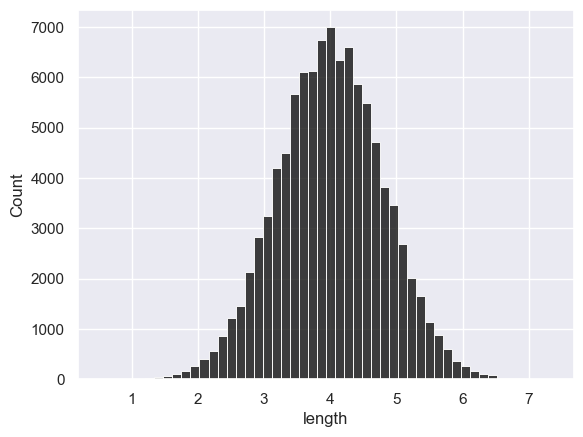

In [19]:
sns.histplot(fish_100000, kde = False, color = 'black', bins = 50)  
# binsの値は自動的に決まるので、ここでは見やすい値を指定しています。

### 母集団分布と正規分布の確率密度関数の比較

In [20]:
x = np.arange(start = 1, stop = 7.1, step = 0.1)
x

array([1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2,
       2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5,
       3.6, 3.7, 3.8, 3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8,
       4.9, 5. , 5.1, 5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1,
       6.2, 6.3, 6.4, 6.5, 6.6, 6.7, 6.8, 6.9, 7. ])

In [21]:
stats.norm.pdf(x = x, loc = 4, scale = 0.8)

array([4.407e-04, 6.988e-04, 1.091e-03, 1.676e-03, 2.536e-03, 3.778e-03,
       5.540e-03, 7.998e-03, 1.137e-02, 1.591e-02, 2.191e-02, 2.971e-02,
       3.967e-02, 5.215e-02, 6.749e-02, 8.598e-02, 1.078e-01, 1.332e-01,
       1.619e-01, 1.938e-01, 2.283e-01, 2.648e-01, 3.025e-01, 3.401e-01,
       3.764e-01, 4.102e-01, 4.401e-01, 4.648e-01, 4.833e-01, 4.948e-01,
       4.987e-01, 4.948e-01, 4.833e-01, 4.648e-01, 4.401e-01, 4.102e-01,
       3.764e-01, 3.401e-01, 3.025e-01, 2.648e-01, 2.283e-01, 1.938e-01,
       1.619e-01, 1.332e-01, 1.078e-01, 8.598e-02, 6.749e-02, 5.215e-02,
       3.967e-02, 2.971e-02, 2.191e-02, 1.591e-02, 1.137e-02, 7.998e-03,
       5.540e-03, 3.778e-03, 2.536e-03, 1.676e-03, 1.091e-03, 6.988e-04,
       4.407e-04])

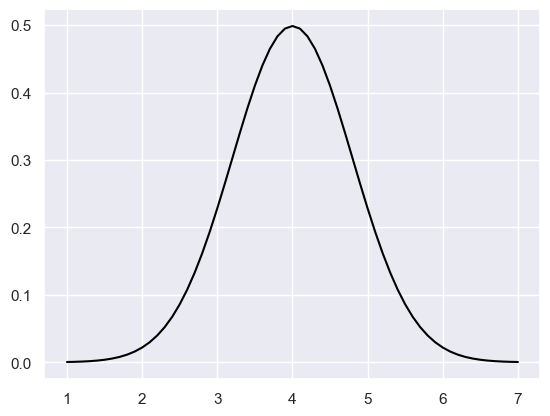

In [22]:
plt.plot(x, 
         stats.norm.pdf(x = x, loc = 4, scale = 0.8), 
         color = 'black')

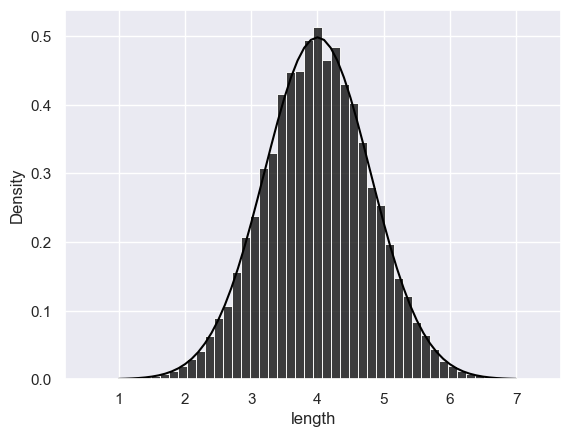

In [23]:
# ヒストグラムに確率密度を重ね合わせる
sns.histplot(fish_100000, kde = False, 
             stat="density", color = 'black', bins=50)
plt.plot(x, 
         stats.norm.pdf(x = x, loc = 4, scale = 0.8), 
         color = 'black')

### 標本が得られるプロセスの抽象化

In [24]:
sampling_norm = stats.norm.rvs(
    loc = 4, scale = 0.8, size = 10)
sampling_norm

array([4.037, 3.498, 4.322, 5.295, 5.499, 2.905, 4.437, 4.665, 3.786,
       4.569])

In [25]:
# 標本平均
np.mean(sampling_norm)

4.301